# flyswot-gym 🦾

This notebook moves through the steps involved in training/updating a flyswot model. 

> This notebook assumes you have already updated the flysheet `dataset` (see the [flyswot-gym](https://github.com/davanstrien/flyswot-gym) repository for guidance on doing this.). 

The notebook goes through the following steps:
- downloads the training data
- prepares the dataset for training the model
- training the model 
- evaluating the model
- making a decision about whether to save the model 
- uploading the model to the 🤗 hub

In [ ]:
#@title Setup git and git-lfs
!apt install git-lfs && git init && git lfs install 
!git config --global credential.helper store

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Initialized empty Git repository in /content/.git/
Updated git hooks.
Git LFS initialized.


In [ ]:
#@title Install flyswot-gym
!pip -q install git+https://github.com/davanstrien/flyswot-gym.git

     |████████████████████████████████| 361 kB 38.0 MB/s 
     |████████████████████████████████| 431 kB 33.7 MB/s 
     |████████████████████████████████| 232 kB 57.7 MB/s 
     |████████████████████████████████| 4.2 MB 48.6 MB/s 
     |████████████████████████████████| 174 kB 51.0 MB/s 
     |████████████████████████████████| 64 kB 2.1 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 99 kB 6.2 MB/s 
     |████████████████████████████████| 1.1 MB 40.7 MB/s 
     |████████████████████████████████| 86 kB 2.7 MB/s 
     |████████████████████████████████| 212 kB 49.9 MB/s 
     |████████████████████████████████| 140 kB 55.1 MB/s 
     |████████████████████████████████| 596 kB 36.4 MB/s 
     |████████████████████████████████| 127 kB 54.6 MB/s 
     |████████████████████████████████| 271 kB 29.2 MB/s 
     |████████████████████████████████| 144 kB 73.9 MB/s 
     |████████████████████████████████| 94 kB 1.1 MB/s 
     |██████████████████

In [ ]:
from huggingface_hub import notebook_login
from huggingface_hub import hf_api
import torch

### Check for Cuda 


In [ ]:
assert torch.cuda.is_available()

In [ ]:
#@title Define training options
model_checkpoint = 'flyswot/convnext-tiny-224_flyswot' #@param ["flyswot/convnext-tiny-224_flyswot", "davanstrien/deit_flyswot"] {allow-input: true}
training_dataset = "davanstrien/hugit_hmd_flysheet" #@param ["flyswot/flysheet_data"] {allow-input: true}
number_of_epochs = 25 #@param {type:"slider", min:10, max:100, step:1}

# Login to the 🤗 hub 

Since we're using private datasets and we want to have the option of pushing our models to the 🤗 hub we ned to ensure we are logged in.

In [ ]:
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [ ]:
api = hf_api.HfApi()
assert api._validate_or_retrieve_token()[0], "not logged in! Please try cell above again"

## Setup training data

This part of the notebook setups the training data for our model. The way in which the data is processed changes depending on our model which is why we need to pass in `model_checkpoint`

In [ ]:
from flyswot_gym.core import prep_data

In [ ]:
flyswot_data = prep_data(training_dataset, model_checkpoint=model_checkpoint)

Downloading:   0%|          | 0.00/894 [00:00<?, ?B/s]

Using custom data configuration davanstrien--hugit_hmd_flysheet-08100e1d1377c64b


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/davanstrien___parquet/davanstrien--hugit_hmd_flysheet-08100e1d1377c64b/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8. Subsequent calls will reuse this data.


Preparing dataset...

dropping duplicates...

Parameter 'function'=<function return_base_path_deduplicated at 0x7f7beb8e7b00> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/1600 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

getting ID...

  0%|          | 0/1275 [00:00<?, ?ex/s]

creating train, valid, test splits...

train has 892 examples

valid has 268 examples

test has 115 examples

Downloading:   0%|          | 0.00/266 [00:00<?, ?B/s]

In [ ]:
assert flyswot_data, "make sure you have loaded data sucessfully"

## Model training 

In [ ]:
from flyswot_gym import core

In [ ]:
trainer = core.train_model(flyswot_data,
                           model_checkpoint, 
                           num_epochs=0.1, hub_model_id="test2")

Dataset({
    features: ['image', 'label', 'fpath', 'clean_path', 'id'],
    num_rows: 892
})

Cloning https://huggingface.co/flyswot/test2 into local empty directory.
[codecarbon INFO @ 10:46:39] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7559428215026855 W
[codecarbon INFO @ 10:46:39] Energy consumed for all GPUs : 0.000343 kWh. All GPUs Power : 27.548000000000002 W
[codecarbon INFO @ 10:46:39] Energy consumed for all CPUs : 0.000532 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:46:39] 0.000935 kWh of electricity used since the begining.
Using amp half precision backend
[codecarbon INFO @ 10:46:43] [setup] RAM Tracking...
[codecarbon INFO @ 10:46:43] [setup] GPU Tracking...
[codecarbon INFO @ 10:46:43] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 10:46:43] [setup] CPU Tracking...
[codecarbon WARNING @ 10:46:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:46:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:46:45] CPU Model on constant consumpt

Epoch,Training Loss,Validation Loss,F1
0,No log,0.112762,0.978678


***** Running Evaluation *****
  Num examples = 268
  Batch size = 4
Saving model checkpoint to output_dir/checkpoint-23
Configuration saved in output_dir/checkpoint-23/config.json
Model weights saved in output_dir/checkpoint-23/pytorch_model.bin
Feature extractor saved in output_dir/checkpoint-23/preprocessor_config.json
Feature extractor saved in output_dir/preprocessor_config.json
[codecarbon INFO @ 10:46:54] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.7559428215026855 W
[codecarbon INFO @ 10:46:54] Energy consumed for all GPUs : 0.000459 kWh. All GPUs Power : 27.746000000000002 W
[codecarbon INFO @ 10:46:54] Energy consumed for all CPUs : 0.000709 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:46:54] 0.001248 kWh of electricity used since the begining.


Training completed. Do not forget to share your model on huggingface.co/models =)


[codecarbon INFO @ 10:46:56] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.7559428215026855 W
[codecarbon INFO @ 10:46:56] En

In [ ]:
outputs = trainer.predict(flyswot_data.test_ds)

***** Running Prediction *****
  Num examples = 115
  Batch size = 4


In [ ]:
outputs.metrics

{'test_f1': 0.9948107448107448,
 'test_loss': 0.07664131373167038,
 'test_runtime': 1.0529,
 'test_samples_per_second': 109.222,
 'test_steps_per_second': 27.543}

[codecarbon INFO @ 10:47:09] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.7559428215026855 W
[codecarbon INFO @ 10:47:09] Energy consumed for all GPUs : 0.000575 kWh. All GPUs Power : 27.845 W
[codecarbon INFO @ 10:47:09] Energy consumed for all CPUs : 0.000886 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:47:09] 0.001559 kWh of electricity used since the begining.


# Inspecting model results

In [ ]:
from flyswot_gym.core import plot_confusion_matrix

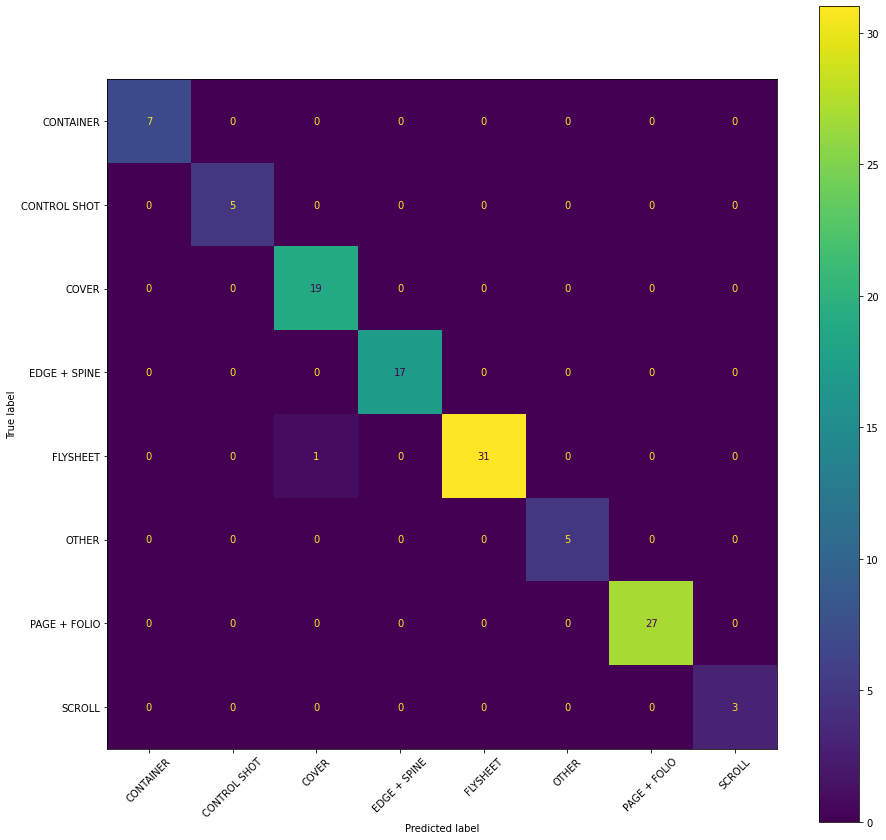

In [ ]:
plot_confusion_matrix(outputs,trainer=trainer)

In [ ]:
from sklearn.metrics import classification_report
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)
print(classification_report(y_true, y_pred, target_names=flyswot_data.train_ds.features['label'].names))

              precision    recall  f1-score   support

   CONTAINER       1.00      1.00      1.00         7
CONTROL SHOT       1.00      1.00      1.00         5
       COVER       0.95      1.00      0.97        19
EDGE + SPINE       1.00      1.00      1.00        17
    FLYSHEET       1.00      0.97      0.98        32
       OTHER       1.00      1.00      1.00         5
PAGE + FOLIO       1.00      1.00      1.00        27
      SCROLL       1.00      1.00      1.00         3

    accuracy                           0.99       115
   macro avg       0.99      1.00      0.99       115
weighted avg       0.99      0.99      0.99       115



In [ ]:
from flyswot_gym.core import create_test_results_df

In [ ]:
report_df = create_test_results_df(outputs,trainer, important_label='FLYSHEET', print_results=True,return_df=True)

misclasified:

y_true y_pred    y_prob
24  FLYSHEET  COVER  0.437256

Number of wrong predictions of FLYSHEET label: 0

Percentage of wrong predictions of FLYSHEET label: 0.0

In [ ]:
mistakes_df = report_df[report_df.y_true != report_df.y_pred]

In [ ]:
mistakes_df['y_prob'].max()

0.4373

In [ ]:
from flyswot_gym.core import create_mistakes_image_navigator

In [ ]:
create_mistakes_image_navigator(report_df, flyswot_data, trainer)

ValueError: ignored

TypeError: ignored

Push to hub?

In [ ]:
trainer.push_to_hub("finshed training")

Saving model checkpoint to output_dir
Configuration saved in output_dir/config.json
Model weights saved in output_dir/pytorch_model.bin
Feature extractor saved in output_dir/preprocessor_config.json
[codecarbon INFO @ 10:57:24] Energy consumed for RAM : 0.000910 kWh. RAM Power : 4.7559428215026855 W
[codecarbon INFO @ 10:57:24] Energy consumed for all GPUs : 0.005618 kWh. All GPUs Power : 31.093 W
[codecarbon INFO @ 10:57:24] Energy consumed for all CPUs : 0.008144 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:57:24] 0.014673 kWh of electricity used since the begining.
To https://huggingface.co/flyswot/test2
   8d5c727..b5a4a3a  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Image Classification', 'type': 'image-classification'}}
[codecarbon INFO @ 10:57:39] Energy consumed for RAM : 0.000930 kWh. RAM Power : 4.7559428215026855 W
[codecarbon INFO @ 10:57:39] Energy consumed for all GPUs : 0.005748 kWh. All GPUs Power : 

'https://huggingface.co/flyswot/test2/commit/b5a4a3ad0bd52cdf15d664c2c24c4ee67539a2dd'